In this notebook i show how to plot graphics useful to analyze data statistically (boxplots & histograms)

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from itertools import cycle

%matplotlib inline

Im going to get a few samples from the standard normal distribution

In [31]:
samples = np.random.randn(4000)

In the next cell, i plot the same histogram graphic but with different values for the plt.hist() method parameters

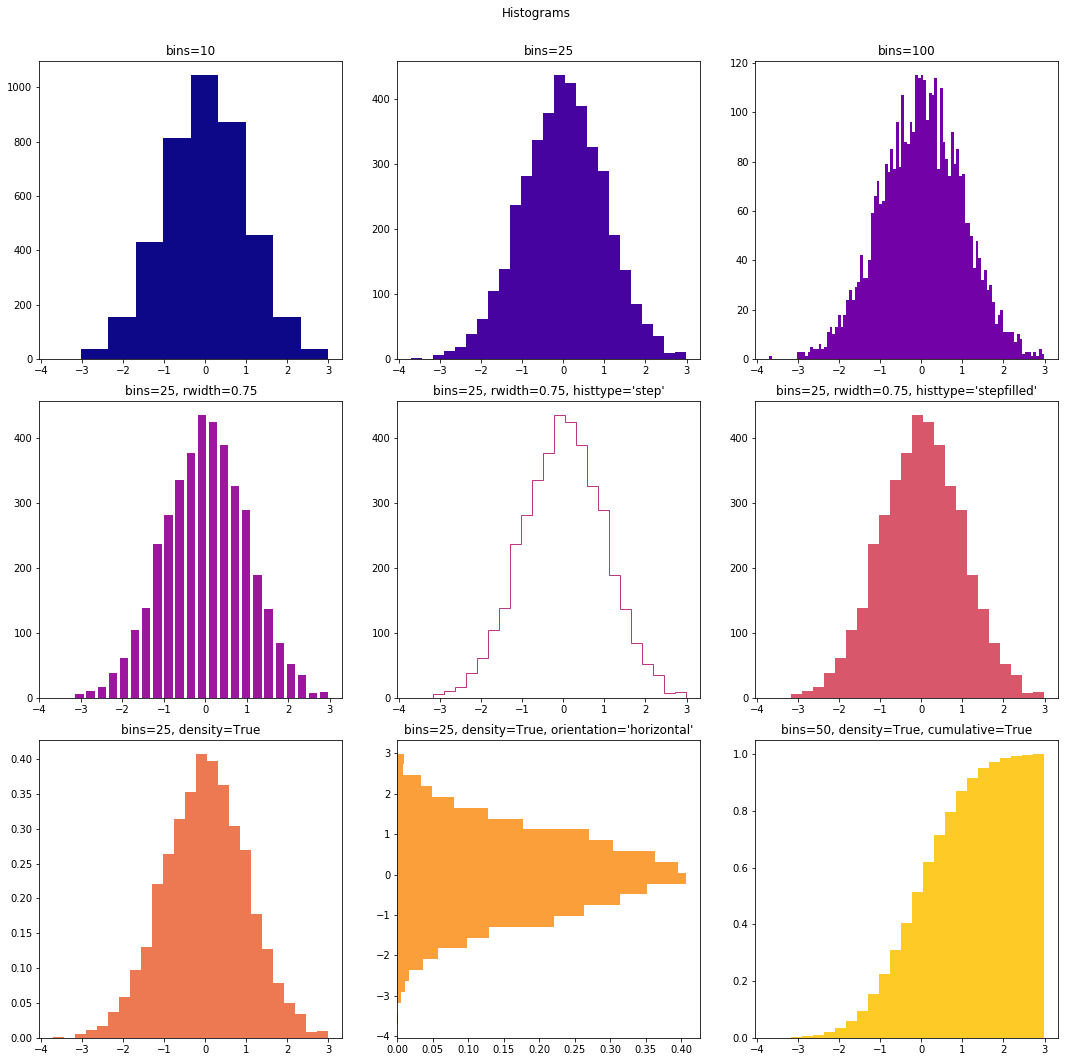

In [64]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

def colors():
    cmap = get_cmap('plasma')
    for x in cycle(np.linspace(0, 1, 10)):
        color = cmap(x)
        yield color
colors = colors()
        
plt.sca(ax[0, 0])
plt.title('bins=10')
plt.hist(samples, bins=10, color=next(colors))

plt.sca(ax[0, 1])
plt.title('bins=25')
plt.hist(samples, bins=25, color=next(colors));

plt.sca(ax[0, 2])
plt.title('bins=100')
plt.hist(samples, bins=100, color=next(colors))

plt.sca(ax[1, 0])
plt.title('bins=25, rwidth=0.75')
plt.hist(samples, bins=25, rwidth=0.75, color=next(colors));

plt.sca(ax[1, 1])
plt.title('bins=25, rwidth=0.75, histtype=\'step\'')
plt.hist(samples, bins=25, rwidth=0.75, histtype='step', color=next(colors));

plt.sca(ax[1, 2])
plt.title('bins=25, rwidth=0.75, histtype=\'stepfilled\'')
plt.hist(samples, bins=25, rwidth=0.75, histtype='stepfilled', color=next(colors));

plt.sca(ax[2, 0])
plt.title('bins=25, density=True')
plt.hist(samples, bins=25, density=True, color=next(colors));

plt.sca(ax[2, 1])
plt.title("bins=25, density=True, orientation='horizontal'")
plt.hist(samples, bins=25, density=True, orientation='horizontal', color=next(colors));

plt.sca(ax[2, 2])
plt.title("bins=50, density=True, cumulative=True")
plt.hist(samples, bins=25, density=True, cumulative=True, color=next(colors));

plt.suptitle('Histograms')
plt.tight_layout()
plt.subplots_adjust(top=0.93)

We can plot the histogram & its quantiles (25, 75 and modal) in the same graphic

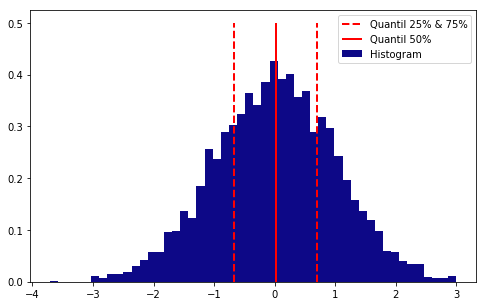

In [107]:
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, color=next(colors));
plt.vlines([np.quantile(samples, 0.25), np.quantile(samples, 0.75)],
           linewidth=2, linestyle='--', color='red', ymin=0, ymax=0.5)
plt.vlines([np.quantile(samples, 0.5)],
           linewidth=2, linestyle='-', color='red', ymin=0, ymax=0.5)

plt.legend(['Quantil 25% & 75%', 'Quantil 50%', 'Histogram']);

Now im going to generate 3 different set of samples. Samples on each set are extracted from different normal distributions (with distinct mean and variance)

In [94]:
samples1 = np.random.randn(500)
samples2 = np.random.randn(500) * 2.5 + 3
samples3 = np.random.randn(500) * 1.5 + 1

Im going to plot each set of samples with a boxplot graphic

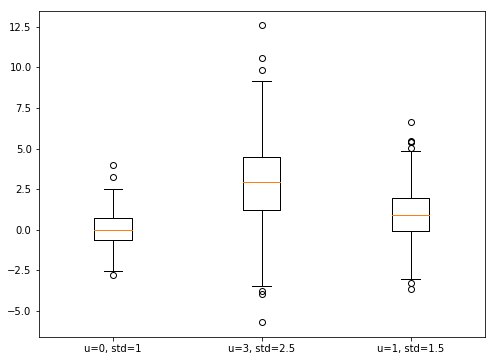

In [120]:
plt.figure(figsize=(8, 6))
plt.boxplot(np.stack([samples1, samples2, samples3], axis=1),
           labels=['u=0, std=1', 'u=3, std=2.5', 'u=1, std=1.5'], widths=0.25);

Another version, but instead of boxes we draw notches and we will orient them horizontally

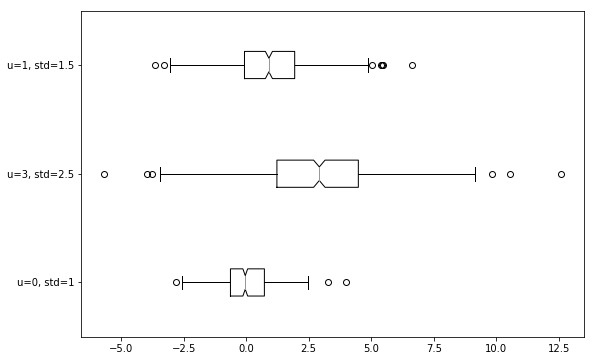

In [119]:
plt.figure(figsize=(9, 6))
plt.boxplot(np.stack([samples1, samples2, samples3], axis=1),
            notch=True, vert=False,
            labels=['u=0, std=1', 'u=3, std=2.5', 'u=1, std=1.5'], widths=0.25);